### Breakdown of Steps
#### Basic Overview:
1. shape provides the number of rows and columns.
2. isnull().sum() highlights missing values for each column.
3. dtypes reveals the data types of columns for better handling.

#### Summary Statistics:
1. describe() gives a quick statistical summary for numerical and categorical columns.

#### Feature Analysis:
1. Histograms (sns.histplot) for numerical distributions.
2. Count plots (sns.countplot) for categorical column distributions.

#### Relationship Analysis:
1. Heatmap (sns.heatmap) visualizes correlations between numerical columns.
2. Scatter plots (sns.scatterplot) show relationships between two numerical features, optionally grouped by a category.

#### Grouped Analysis:
1. groupby aggregates statistics (e.g., mean, std) for a specific column grouped by categories.
2. Bar plots visualize these group-level statistics.

### What You’ll Gain
#### General Trends:
1. Distributions of height, elevation, and other metrics.

#### Data Gaps:
1. Insights into missing or inconsistent data.

#### Relationships:
1. Correlations between features like area and compactness.

#### Categorical Insights:
1. Counts and averages by groups (e.g., unit_usage).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
geometries = pd.read_csv(r'E:\Data Analytics\Swiss Apartment Models\geometries.csv')

In [6]:
geometries.head()

,apartment_id,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,entity_type,entity_subtype,geometry,elevation,height
0,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619311.0,RESIDENTIAL,area,BATHROOM,POLYGON ((-2.7337844078265210 4.07980744083215...,0.0,2.6
1,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619303.0,RESIDENTIAL,area,LIVING_ROOM,POLYGON ((5.8278988701887320 7.816876723402971...,0.0,2.6
2,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619322.0,RESIDENTIAL,area,ROOM,POLYGON ((6.7557107205191187 2.413369594812586...,0.0,2.6
3,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619310.0,RESIDENTIAL,area,KITCHEN,POLYGON ((3.5821200013910017 5.140461688341117...,0.0,2.6
4,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619312.0,RESIDENTIAL,area,ROOM,POLYGON ((3.0141380455489282 4.182056855151666...,0.0,2.6


In [8]:
simulations = pd.read_csv(r'E:\Data Analytics\Swiss Apartment Models\simulations.csv')

In [10]:
simulations.head()

,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,apartment_id,layout_compactness,layout_is_navigable,...,connectivity_balcony_distance_stddev,connectivity_loggia_distance_max,connectivity_loggia_distance_mean,connectivity_loggia_distance_median,connectivity_loggia_distance_min,connectivity_loggia_distance_p20,connectivity_loggia_distance_p80,connectivity_loggia_distance_stddev,layout_biggest_rectangle_length,layout_biggest_rectangle_width
0,210,399,1054,1588,7300,619322,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.751449,True,...,1.099979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.453946,3.539037
1,210,399,1054,1588,7300,619310,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.768121,True,...,0.997100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156488,3.082780
2,210,399,1054,1588,7300,619311,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.701784,True,...,0.392496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.357677,1.429785
3,210,399,1054,1588,7300,619303,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.777285,True,...,1.235303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156488,3.389554
4,210,399,1054,1588,7300,619315,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.785398,True,...,0.426017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.685255,1.685255


In [12]:
#Shape of the datasets
print('Geometries Shape:', geometries.shape)
print('Simulations Shape:', simulations.shape)

Geometries Shape: (3255905, 13)
Simulations Shape: (367678, 369)


In [16]:
#Check for missing values
print('Missing Values in Geometries:\n', geometries.isnull().sum())
print('Missing Values in Simulations:\n', simulations.isnull().sum())

Missing Values in Geometries:
 apartment_id       588501
site_id                 0
building_id             0
plan_id                 0
floor_id                0
unit_id            588501
area_id           2415749
unit_usage              0
entity_type             0
entity_subtype          0
geometry                0
elevation               0
height                  0
dtype: int64
Missing Values in Simulations:
 site_id                                     0
building_id                                 0
plan_id                                     0
floor_id                                    0
unit_id                                     0
                                        ...  
connectivity_loggia_distance_p20       332655
connectivity_loggia_distance_p80       332655
connectivity_loggia_distance_stddev    332655
layout_biggest_rectangle_length            58
layout_biggest_rectangle_width             58
Length: 369, dtype: int64


In [18]:
#Data types of columns
print('Data Types in Geometries:\n', geometries.dtypes)
print('Data Types in Simulations:\n', simulations.dtypes)

Data Types in Geometries:
 apartment_id       object
site_id             int64
building_id         int64
plan_id             int64
floor_id            int64
unit_id           float64
area_id           float64
unit_usage         object
entity_type        object
entity_subtype     object
geometry           object
elevation         float64
height            float64
dtype: object
Data Types in Simulations:
 site_id                                  int64
building_id                              int64
plan_id                                  int64
floor_id                                 int64
unit_id                                  int64
                                        ...   
connectivity_loggia_distance_p20       float64
connectivity_loggia_distance_p80       float64
connectivity_loggia_distance_stddev    float64
layout_biggest_rectangle_length        float64
layout_biggest_rectangle_width         float64
Length: 369, dtype: object


In [20]:
# Numerical summary
print('Numerical Summary of Geometries:\n', geometries.describe())
print('Numerical Summary of Simulations:\n', simulations.describe())

Numerical Summary of Geometries:
             site_id   building_id       plan_id      floor_id       unit_id  \
count  3.255905e+06  3.255905e+06  3.255905e+06  3.255905e+06  2.667404e+06   
mean   2.588307e+03  4.398214e+03  1.316622e+04  1.744027e+04  6.719335e+04   
std    3.734114e+03  5.722709e+03  1.467519e+04  1.660160e+04  4.844788e+04   
min    1.700000e+01  1.000000e+00  2.000000e+00  2.000000e+00  4.967000e+03   
25%    4.690000e+02  1.121000e+03  3.383000e+03  5.200000e+03  2.813600e+04   
50%    9.190000e+02  2.047000e+03  6.254000e+03  1.033900e+04  5.324800e+04   
75%    2.272000e+03  3.392000e+03  1.651100e+04  2.539500e+04  1.001400e+05   
max    1.192300e+04  1.865500e+04  4.439600e+04  5.172500e+04  1.616240e+05   

            area_id     elevation        height  
count  8.401560e+05  3.255905e+06  3.255905e+06  
mean   7.819682e+05  7.336867e+00  2.216333e+00  
std    4.569955e+05  6.786311e+00  6.454510e-01  
min    2.736420e+05 -1.160000e+01  2.000000e-01  
25% 

In [24]:
# Categorical Summary
print('Categorical Summary of Geometries:\n', geometries.describe(include='object'))
print('Categorical Summary of Simulations:\n', simulations.describe(include='object'))

Categorical Summary of Geometries:
                             apartment_id   unit_usage entity_type  \
count                            2667404      3255905     3255905   
unique                             45175            5           4   
top     d41d8cd98f00b204e9800998ecf8427e  RESIDENTIAL   separator   
freq                                5091      2650784     1700813   

       entity_subtype                                           geometry  
count         3255905                                            3255905  
unique             91                                            1756627  
top              WALL  POLYGON ((2.6161651226962377 3.584868086550756...  
freq          1519546                                                 48  
Categorical Summary of Simulations:
          unit_usage                      apartment_id layout_area_type
count        367678                            367678           367678
unique            1                             44888           

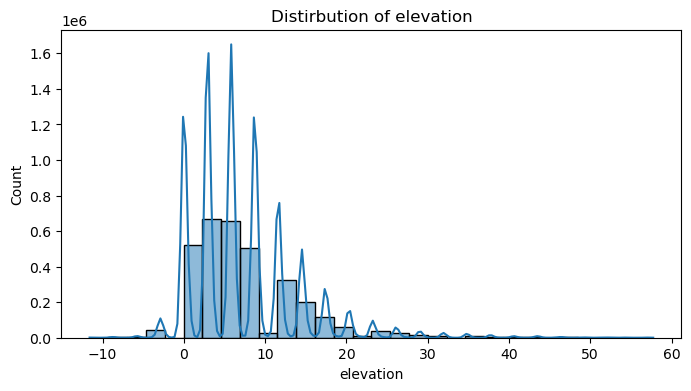

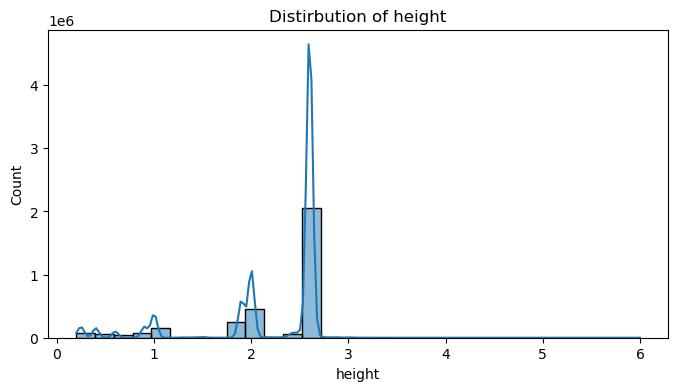

In [28]:
# Distribution of key numerical features
numerical_cols = ['elevation', 'height']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(geometries[col], kde=True, bins=30)
    plt.title(f'Distirbution of {col}')
    plt.show()

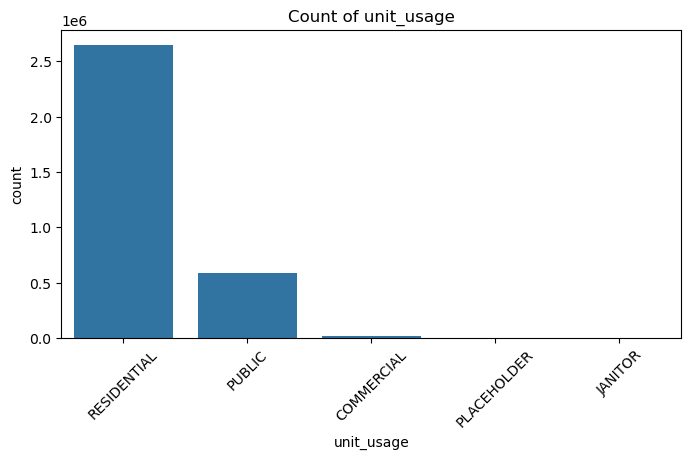

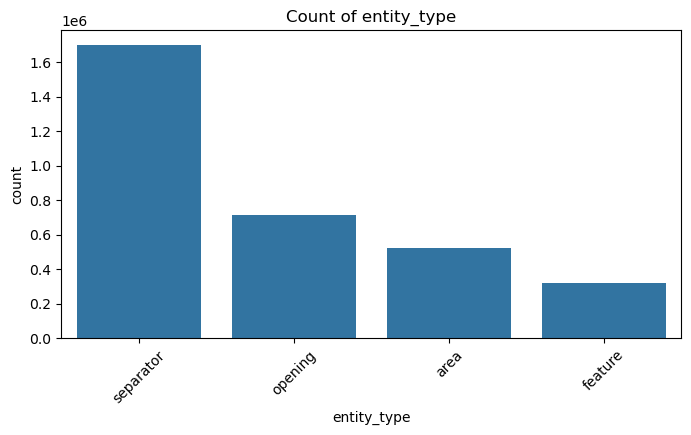

In [30]:
# Count of categorical features
categorical_cols = ['unit_usage', 'entity_type']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=geometries, x=col, order=geometries[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [32]:
# Correlation heatmap for numerical columns in simulations
numerical_cols_simulations = simulations.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = simulations[numerical_cols_simulations].corr()

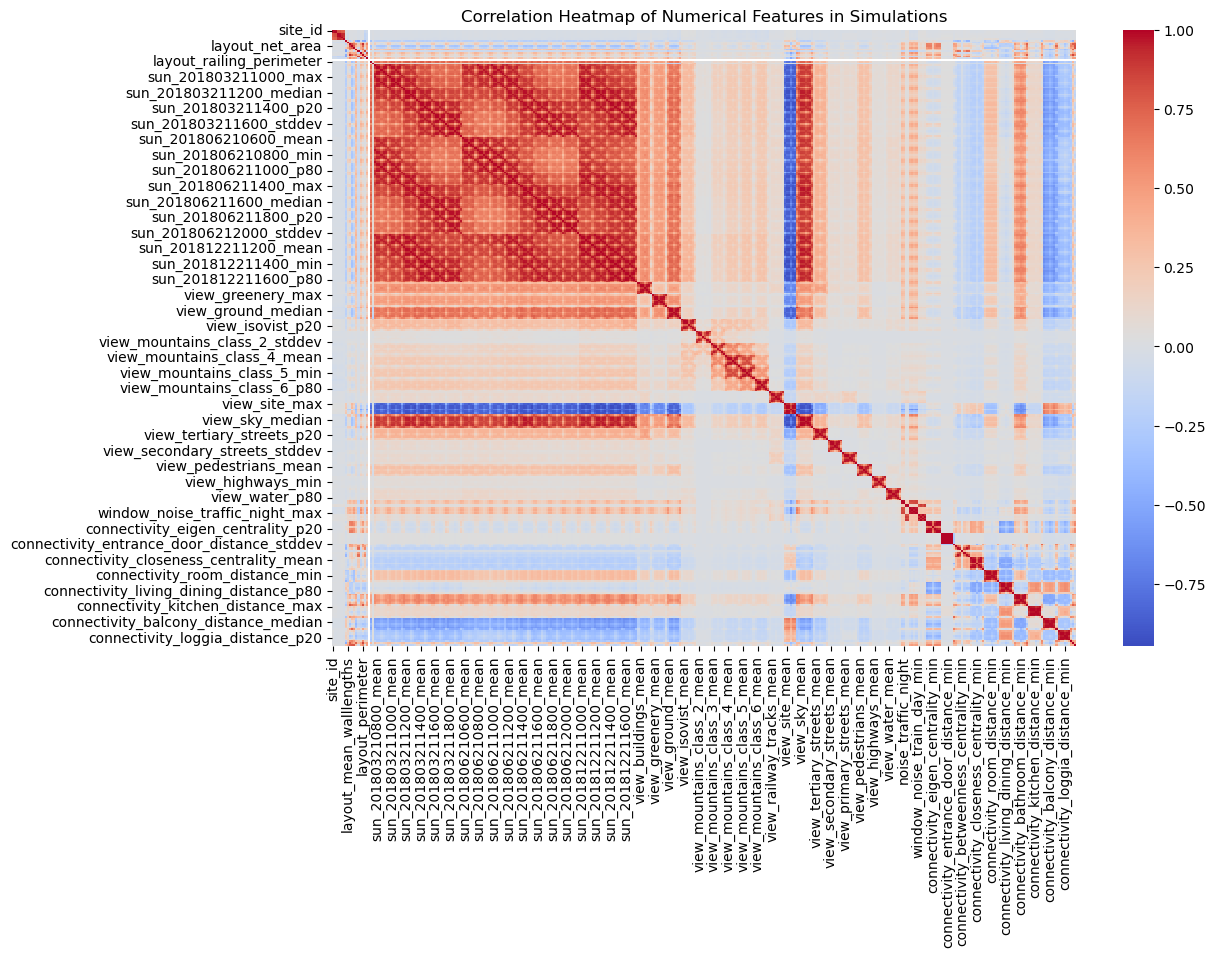

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features in Simulations')
plt.show()

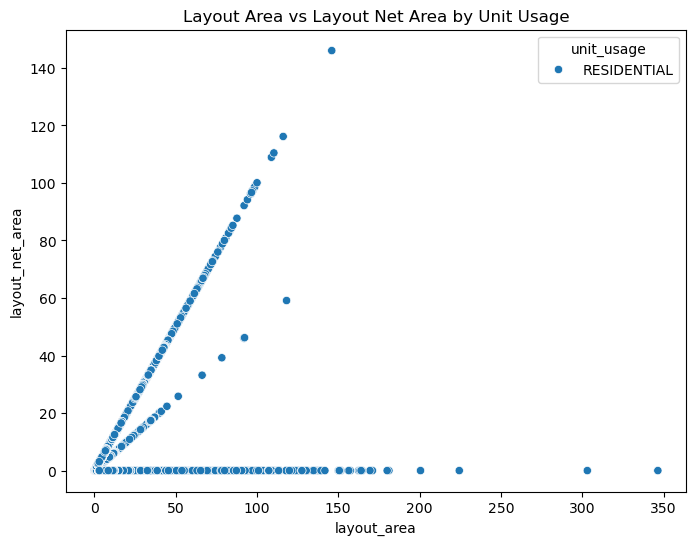

In [36]:
# Scatter plot example
plt.figure(figsize=(8,6))
sns.scatterplot(data=simulations, x='layout_area', y='layout_net_area', hue='unit_usage')
plt.title('Layout Area vs Layout Net Area by Unit Usage')
plt.show()

In [38]:
# Group by unit_usage to calculate mean and std of layout_area
grouped_stats = simulations.groupby('unit_usage')['layout_area'].agg(['mean', 'std', 'min', 'max'])
print('Grouped Statistics by Unit Usage:\n', grouped_stats)

Grouped Statistics by Unit Usage:
                   mean       std       min         max
unit_usage                                            
RESIDENTIAL  10.958213  8.417667  0.002475  346.485584


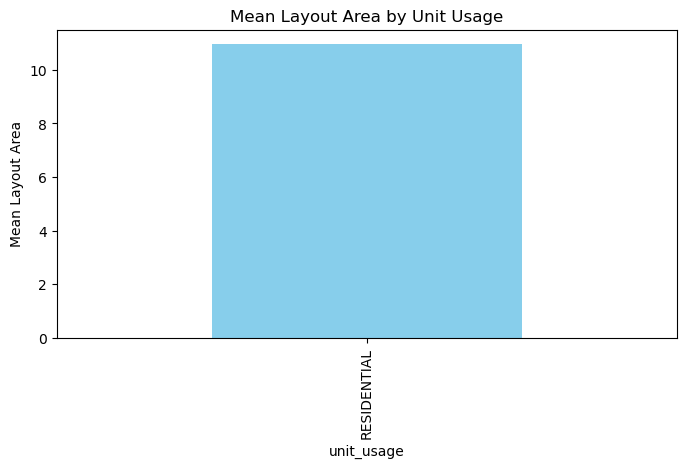

In [40]:
# Plot mean layout_area by unit_usage
plt.figure(figsize=(8,4))
grouped_stats['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Layout Area by Unit Usage')
plt.ylabel('Mean Layout Area')
plt.show()